<a href="https://colab.research.google.com/github/yabbou/python-data-science/blob/main/hw_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Wines Study**

###Question: Can we find the which wines sell the most? What qualities are found in these wines?

Problem: the data is not necessarily the most reliable. Perhpas a non-liear regression model must be used to predict the `CasesSold` of new wines that will be added to the dataset.

###Definitions:

####Numeric data columns:
---

**1. Target (CasesSold)** - This represents the response variable, the number of cases sold.

**2. Fixed Acidity** - The predominant fixed acids found in wines are tartaric, malic, citric, and succinic. The respective acid levels can vary greatly, but range between a total of **0 and 14.5 g/L** in wine. See [here](https://waterhouse.ucdavis.edu/whats-in-wine/fixed-acidity).

* 1 to 4 g/L tartaric acid
* 0 to 8 g/L malic acid
* 0 to 0.5 g/L citric acid
* 0.5 to 2 g/L succinic acid

**3. Volatile Acidity** - A measure of the wine's volatile (or gaseous) acids.
The primary volatile acid in wine is acetic acid, which is also the primary acid associated with its smell and taste of vinegar.
According to the federal Tax and Trade Bureau, the maximum volatile acidity is:

* **1.4 g/L** for red wine
* 1.2 g/L for white wine

**4. Citric Acid** - A weak organic acid that occurs naturally in citrus fruits. (Part of the acids that make up `Fixed Acidity`.)

---

**5. Residual Sugar** - sugar after completion of fermentation. Value can span smaller ranges between **1 and 200g/L**, depending on the type of wine. See [here](http://www.moundtop.com/pdf/Winemaking-ResidualSugar.pdf).

**6. Chlorides** - major contributor to saltiness. Wines contain **2 to 4 g/L** of salts of mineral acids, along with some organic acids. See [here](https://www.scielo.br/scielo.php?script=sci_arttext&pid=S0101-20612015000100095#:~:text=Wine%20contains%20from%202%20to,2003%3B%20Maltman%2C%202013).

**7. Free Sulfur Dioxide (FSO2)** - FSO2 and the pH of a wine determine how much SO^2 is available in the active, molecular form to help protect the wine from oxidation and spoilage. Higher with higher ph, higher in wihite wines. Maximum we are working with is 124 ppm (**0.12 g/L**). See [here](https://swgga.org/wp-content/uploads/2017/08/Target-sulfite-levels.pdf)

**8. Total Sulfur Dioxide (TSO2)** - TSO2 is the portion of SO2 that is free in the wine, PLUS the SO2 bound to other chemicals in the wine (such as its aldehydes, pigments, and sugars). The maximum concentration permitted by the Bureau for a bottled wine is 350 ppm (**0.45 g/L**) of TSO2. See [here](https://www.extension.iastate.edu/wine/total-sulfur-dioxide-why-it-matters-too)

---

**9. Density** - mass per unit of volume. According to [this chart](https://th.bing.com/th/id/R861984a0b00562e9f258c071ad38c538?rik=Pp7J8fTiQuF72A&riu=http%3a%2f%2fwinecellarinnovations.com%2fimages%2fwood%2520optionstypes%2fwd-chart.jpg&ehk=BOdoOVC%2bN2FsdCIHlrfvbOwwUkwN3UVrfZlgo%2b4W3f0%3d&risl=&pid=ImgRaw), common wines can range from 26 to 53 lb/ft^3 (**0.42 to 0.85 g/mL**) [Another chart](https://www.researchgate.net/publication/333580168/figure/download/tbl3/AS:768503879589889@1560237011089/Evolution-of-density-g-mL-1-during-ripening-of-Cabernet-Sauvignon-grape-grafted-on.png) even included denisties above **1 g/mL**.

**10. pH** - According to [this link](https://daily.sevenfifty.com/how-winemakers-analyze-ph-and-its-impact-on-wine/), pH levels in wine are generally between 3 and 4, with some wines even between high **2s or low 4s.** 

**11. Sulphates** - According to [this link](http://blog.lastbottlewines.com/education/sulphites/), the level of sulfites in wine can vary from **0.15 to 0.3g/L** depending on the type of wine. (This variable likely refers to _sulfites_.)

**12. Alcohol** - Non-alcoholic wine indeed exists; alcohol content in wine can range from as low as **5.5% to 23%** Alchohol By Volume (ABV). See [here](https://winefolly.com/tips/the-lightest-to-the-strongest-wine/)

---
**13. Acid Index** - Acording to this [link](http://www.bcawa.ca/winemaking/acidph.htm), calculated by subtracting the pH from the Total Acidity (`Fixed acidity` plus `Volatile acidity`). 

####Categorical data columns: 

**14. Label Appeal** - subjective marketing score that indicates the appeal of the bottle's label design. Given with dataset.

**15. STARS (Rating)** - wine rating (4 = excellent; 1 = poor).

EDA
==

What does our data look like?

In [250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import warnings

warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)
warnings.filterwarnings("ignore")

wines_df = pd.read_csv("https://raw.githubusercontent.com/yabbou/python-data-science/main/hw_3/Wines.csv")
wines_df = wines_df.rename(columns={'TARGET':'CasesSold','STARS':'Rating'}).drop('INDEX',axis=1)
wines_df = wines_df[wines_df.columns[[0,1,2,3,4,5,6,7,8,9,10,11,13,12,14]]] #grouped categorical data together as last two columns

wines_df.describe()

,CasesSold,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,AcidIndex,LabelAppeal,Rating
count,12795.000000,12795.000000,12795.000000,12795.000000,12179.000000,12157.000000,12148.000000,12113.000000,12795.000000,12400.000000,11585.000000,12142.000000,12795.000000,12795.000000,9436.000000
mean,3.029074,7.075717,0.324104,0.308413,5.418733,0.054822,30.845571,120.714233,0.994203,3.207628,0.527112,10.489236,7.772724,-0.009066,2.041755
std,1.926368,6.317643,0.784014,0.862080,33.749379,0.318467,148.714558,231.913211,0.026538,0.679687,0.932129,3.727819,1.323926,0.891089,0.902540
min,0.000000,-18.100000,-2.790000,-3.240000,-127.800000,-1.171000,-555.000000,-823.000000,0.888090,0.480000,-3.130000,-4.700000,4.000000,-2.000000,1.000000
25%,2.000000,5.200000,0.130000,0.030000,-2.000000,-0.031000,0.000000,27.000000,0.987720,2.960000,0.280000,9.000000,7.000000,-1.000000,1.000000
50%,3.000000,6.900000,0.280000,0.310000,3.900000,0.046000,30.000000,123.000000,0.994490,3.200000,0.500000,10.400000,8.000000,0.000000,2.000000
75%,4.000000,9.500000,0.640000,0.580000,15.900000,0.153000,70.000000,208.000000,1.000515,3.470000,0.860000,12.400000,8.000000,1.000000,3.000000
max,8.000000,34.400000,3.680000,3.860000,141.150000,1.351000,623.000000,1057.000000,1.099240,6.130000,4.240000,26.500000,17.000000,2.000000,4.000000


Outliers?

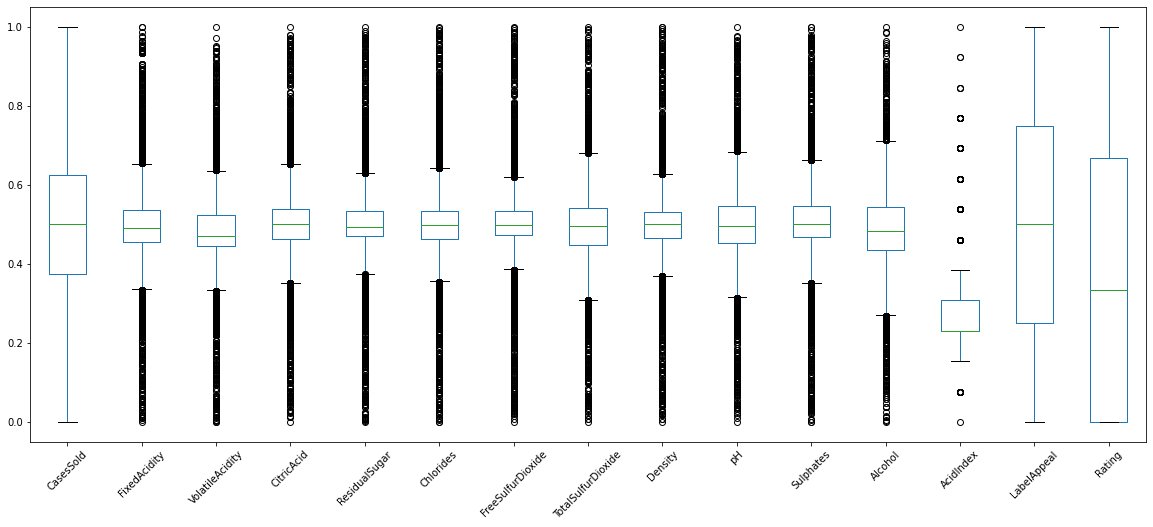

In [251]:
plt.figure(figsize=(20,8))
wines_without_nulls_df = wines_df.copy().dropna()
wines_normalized_maxmin_df =(wines_without_nulls_df-wines_without_nulls_df.min())/(wines_without_nulls_df.max()-wines_without_nulls_df.min())
wines_normalized_maxmin_df.boxplot(grid=False, rot=45)

Wow, it appears that the overwhelming majority of columns consists of many outliers... dropping those columns would possibly remove a bit too much data needed for analysis. So they will be kept.

Are there any unexpected values within these columns?

In [252]:
COLS = wines_df.columns
for x in range(COLS.shape[0]):
  print(COLS[x])
  print(np.unique(wines_df.iloc[:,x]),'\n')

CasesSold
[0 1 2 3 4 5 6 7 8] 

FixedAcidity
[-18.1  -18.   -17.7  -17.5  -17.4  -17.3  -17.2  -17.1  -17.   -16.8
 -16.7  -16.6  -16.5  -16.2  -16.1  -16.   -15.9  -15.7  -15.5  -15.4
 -15.3  -15.2  -15.1  -15.   -14.9  -14.7  -14.5  -14.4  -14.3  -14.1
 -14.   -13.9  -13.8  -13.7  -13.5  -13.4  -13.3  -13.2  -13.1  -12.9
 -12.8  -12.6  -12.5  -12.4  -12.3  -12.2  -12.1  -11.9  -11.8  -11.7
 -11.6  -11.5  -11.4  -11.2  -11.1  -11.   -10.9  -10.8  -10.7  -10.6
 -10.5  -10.4  -10.3  -10.1  -10.    -9.9   -9.8   -9.5   -9.4   -9.3
  -9.2   -9.1   -9.    -8.9   -8.8   -8.6   -8.5   -8.4   -8.2   -8.1
  -7.8   -7.7   -7.6   -7.5   -7.4   -7.3   -7.1   -7.    -6.9   -6.8
  -6.7   -6.6   -6.5   -6.4   -6.3   -6.2   -6.1   -6.    -5.9   -5.8
  -5.7   -5.6   -5.5   -5.4   -5.3   -5.2   -5.1   -5.    -4.9   -4.8
  -4.7   -4.6   -4.5   -4.4   -4.3   -4.2   -4.1   -4.    -3.9   -3.8
  -3.7   -3.6   -3.5   -3.4   -3.3   -3.2   -3.1   -3.    -2.9   -2.8
  -2.7   -2.6   -2.5   -2.4   -2.3   -2.2   -

Some columns have *very* many values! And some appear to have many nulls. Which columns have nulls?

In [253]:
wines_null_count = wines_df.isnull().sum()
wines_null_count

CasesSold                0
FixedAcidity             0
VolatileAcidity          0
CitricAcid               0
ResidualSugar          616
Chlorides              638
FreeSulfurDioxide      647
TotalSulfurDioxide     682
Density                  0
pH                     395
Sulphates             1210
Alcohol                653
AcidIndex                0
LabelAppeal              0
Rating                3359
dtype: int64

Some columsn appear to be fully populated. Others less so. What are the percetages of those lesser populated columns?

In [254]:
wines_null_count/len(wines_df) *100

CasesSold              0.000000
FixedAcidity           0.000000
VolatileAcidity        0.000000
CitricAcid             0.000000
ResidualSugar          4.814381
Chlorides              4.986323
FreeSulfurDioxide      5.056663
TotalSulfurDioxide     5.330207
Density                0.000000
pH                     3.087143
Sulphates              9.456819
Alcohol                5.103556
AcidIndex              0.000000
LabelAppeal            0.000000
Rating                26.252442
dtype: float64

<Figure size 1440x576 with 0 Axes>

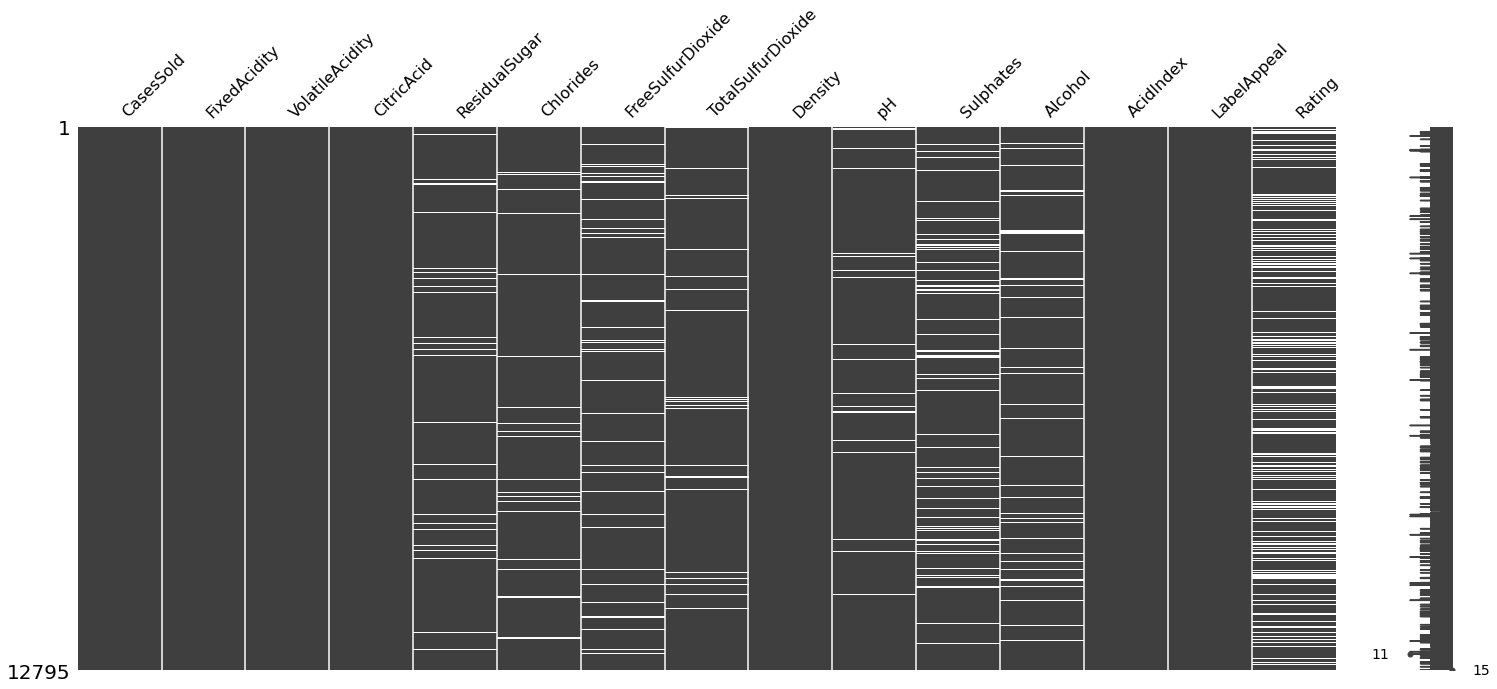

In [255]:
plt.figure(figsize=(20,8))
nulls_visual = msno.matrix(wines_df)

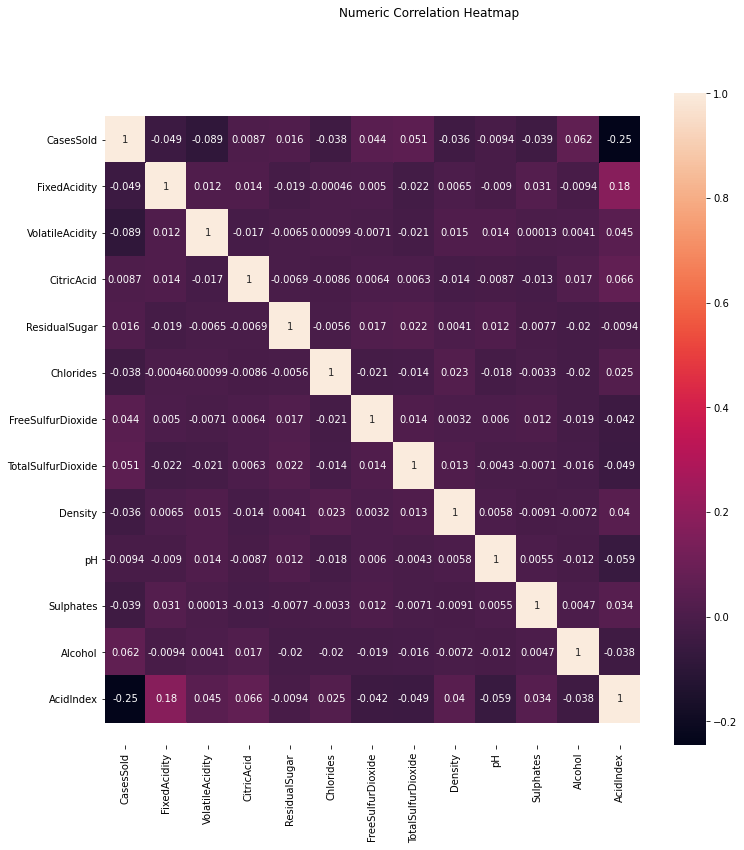

In [256]:
fig = plt.figure(figsize=(12, 12)) 
corr = wines_df.copy().drop(['LabelAppeal','Rating'], axis='columns').corr() #dropping categorical data, as not numerically meaningful
sns.heatmap(corr, annot=True)

b, t = plt.ylim()
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
fig.suptitle('Numeric Correlation Heatmap') 
plt.show()

These graphs depict no noticable trend amongst missing data, as well as no noticable correlation. The data appears to have randomly missing values. In the heatmap, `LabelAppeal` and `Rating` have higher correlations each other, but in fact store categorical data, which is not .



In [257]:
null_cloumns = []
for x in range(len(COLS)):
  if wines_null_count[x] > 0:
    null_cloumns.append(COLS[x])

n = len(null_cloumns)
tot = len(COLS)
print(f'{n} of {tot} columns have null values ({n/tot *100:.2f}%)')
print('Coulmns with null values:',null_cloumns)

8 of 15 columns have null values (53.33%)
Coulmns with null values: ['ResidualSugar', 'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide', 'pH', 'Sulphates', 'Alcohol', 'Rating']


Half of the columns have null values, most commonly 5% null. Not too much missing data. Though, the `Ratings` column is missing _25% of its data_! Are `Rating` and the number of cases sold highly related? Could the `Rating` column be deleted?

Rating correlation to Cases Sold: 55.879% (9436 rows, 100% of total rows)
Rating correlation to Cases Sold: 55.593% (472 rows, 5% of total rows)


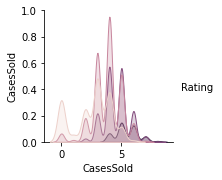

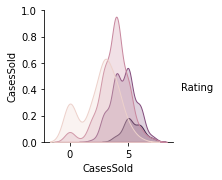

In [258]:
wines_without_null_ratings = wines_df.loc[:,['CasesSold','Rating']].copy()
wines_without_null_ratings = wines_without_null_ratings.dropna()
TOTAL_ROWS = wines_without_null_ratings.shape[0]

def ratingCorrAndGraph(df):
  rating_cases_corr = df.corr()['CasesSold']['Rating']
  rows = df.shape[0]
  print(f'Rating correlation to Cases Sold: {rating_cases_corr*100:.3f}% ({rows} rows, {round(rows/TOTAL_ROWS*100)}% of total rows)')
  sns.pairplot(df, hue='Rating')

ratingCorrAndGraph(wines_without_null_ratings)
ratingCorrAndGraph(wines_without_null_ratings.sort_values(by='CasesSold',ascending=True).iloc[::20]) 
# ratingCorrAndGraph(wines_without_null_ratings.sort_values(by='CasesSold',ascending=False).iloc[::20]) #less accurate: 56% corr

The correlation between more cases sold and higer rated wines is only around 55%. The more wines sold does not necessarily mean they will become more highly rated. The data is fairly sporadic, so a twentith of the data was also taken to  a better present a general picture of possible underlying trends. In general, the lower rated wines received lower ratings and higher rated wines higher ratings. But definitely not as linearly as could be. So the `Rating` column is not automatically disposable.

Are any of the variables unrealistic, based on our provided expert knowledge?

In [259]:
wines_df.describe()

,CasesSold,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,AcidIndex,LabelAppeal,Rating
count,12795.000000,12795.000000,12795.000000,12795.000000,12179.000000,12157.000000,12148.000000,12113.000000,12795.000000,12400.000000,11585.000000,12142.000000,12795.000000,12795.000000,9436.000000
mean,3.029074,7.075717,0.324104,0.308413,5.418733,0.054822,30.845571,120.714233,0.994203,3.207628,0.527112,10.489236,7.772724,-0.009066,2.041755
std,1.926368,6.317643,0.784014,0.862080,33.749379,0.318467,148.714558,231.913211,0.026538,0.679687,0.932129,3.727819,1.323926,0.891089,0.902540
min,0.000000,-18.100000,-2.790000,-3.240000,-127.800000,-1.171000,-555.000000,-823.000000,0.888090,0.480000,-3.130000,-4.700000,4.000000,-2.000000,1.000000
25%,2.000000,5.200000,0.130000,0.030000,-2.000000,-0.031000,0.000000,27.000000,0.987720,2.960000,0.280000,9.000000,7.000000,-1.000000,1.000000
50%,3.000000,6.900000,0.280000,0.310000,3.900000,0.046000,30.000000,123.000000,0.994490,3.200000,0.500000,10.400000,8.000000,0.000000,2.000000
75%,4.000000,9.500000,0.640000,0.580000,15.900000,0.153000,70.000000,208.000000,1.000515,3.470000,0.860000,12.400000,8.000000,1.000000,3.000000
max,8.000000,34.400000,3.680000,3.860000,141.150000,1.351000,623.000000,1057.000000,1.099240,6.130000,4.240000,26.500000,17.000000,2.000000,4.000000


In [272]:
fixed_acidity_gL_range = [0,14.5]
volatile_acidity_gL_range = [0,1.4]
citric_acidity_gL_range = [0,0.5]

residual_sugar_gL_range = [1,200]
chlorides_gL_range = [2,4]
fso2_ppm_range = [13.2,124]
tso2_ppm_range = [13.2,350]

density_gL_range = [0.42,1.1]
pH_range = [2.5,4.5]
suphites_gL_range = [0.15,0.3]
alcohol_percent_range = [5.5,23]

acid_index_range = [-2.5,20.4] #min and max combinations of (fixed + vol acidity) - pH 
col_ranges = [[0,0],fixed_acidity_gL_range,volatile_acidity_gL_range,citric_acidity_gL_range,
              residual_sugar_gL_range,chlorides_gL_range,fso2_ppm_range,tso2_ppm_range,
              density_gL_range,pH_range,suphites_gL_range,alcohol_percent_range,acid_index_range]

def checkExpertKnowledgeOfColumnRanges(cols, col_ranges):
  row_indexes_outside_range = {}
  print(f'Number of rows OUTSIDE the expert domain knowledge range:\n')

  for x in cols:
    x_below_minimum_range = wines_df.iloc[:,1] < col_ranges[x][0]
    y_above_maximum_range = wines_df.iloc[:,1] > col_ranges[x][1]

    rows_outside_range = wines_df[(x_below_minimum_range) | (y_above_maximum_range)] 
    rows_outside_range_indexes = rows_outside_range.index
    row_indexes_outside_range.update({COLS[x]:rows_outside_range_indexes})

    col = wines_df.copy()
    col.drop(rows_outside_range_indexes, inplace = True)
    print(f'{COLS[x]:>18} --- {col.shape[0]:>5} rows ({col.shape[0]/max(wines_df.shape[0],1) *100:.2f}%)')
  return row_indexes_outside_range

NUMERIC_COLUMN_INDECIES = range(1,13)
row_indexes_outside_range_dict = checkExpertKnowledgeOfColumnRanges(NUMERIC_COLUMN_INDECIES, col_ranges)

Number of rows OUTSIDE the expert domain knowledge range:

      FixedAcidity ---  9631 rows (75.27%)
   VolatileAcidity ---   440 rows (3.44%)
        CitricAcid ---   178 rows (1.39%)
     ResidualSugar --- 10888 rows (85.10%)
         Chlorides ---   623 rows (4.87%)
 FreeSulfurDioxide ---  1945 rows (15.20%)
TotalSulfurDioxide ---  1945 rows (15.20%)
           Density ---   199 rows (1.56%)
                pH ---   591 rows (4.62%)
         Sulphates ---    49 rows (0.38%)
           Alcohol ---  9259 rows (72.36%)
         AcidIndex --- 11644 rows (91.00%)


`Acid Index` and `Residual Sugar` count for the most data values outside its expected range, namely above 80% of its values! Besides for `Fixed Acidity` and `Alcohol` with around 75% unexpected values, the other columns appear to hold relatively accurate information. And as seen from the heatmap above, these columns do not correlate highly with the number of cases sold. So we will just drop these columns.


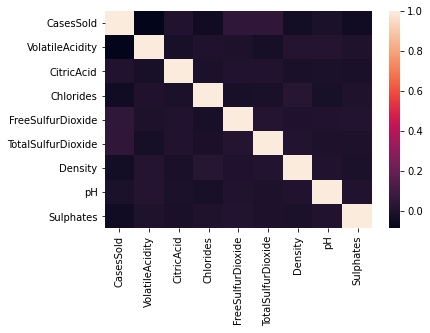

In [261]:
wines_within_range_df = wines_df.copy()
wines_within_range_df.drop(['AcidIndex','ResidualSugar','FixedAcidity','Alcohol', 'LabelAppeal','Rating'], axis='columns',inplace = True)
corr = wines_within_range_df.corr()
sns.heatmap(corr)

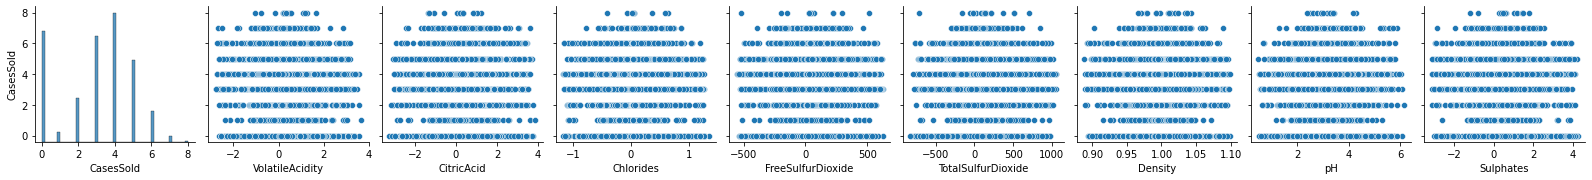

In [262]:
CASES = 'CasesSold'
sns.pairplot(wines_within_range_df,y_vars=CASES)

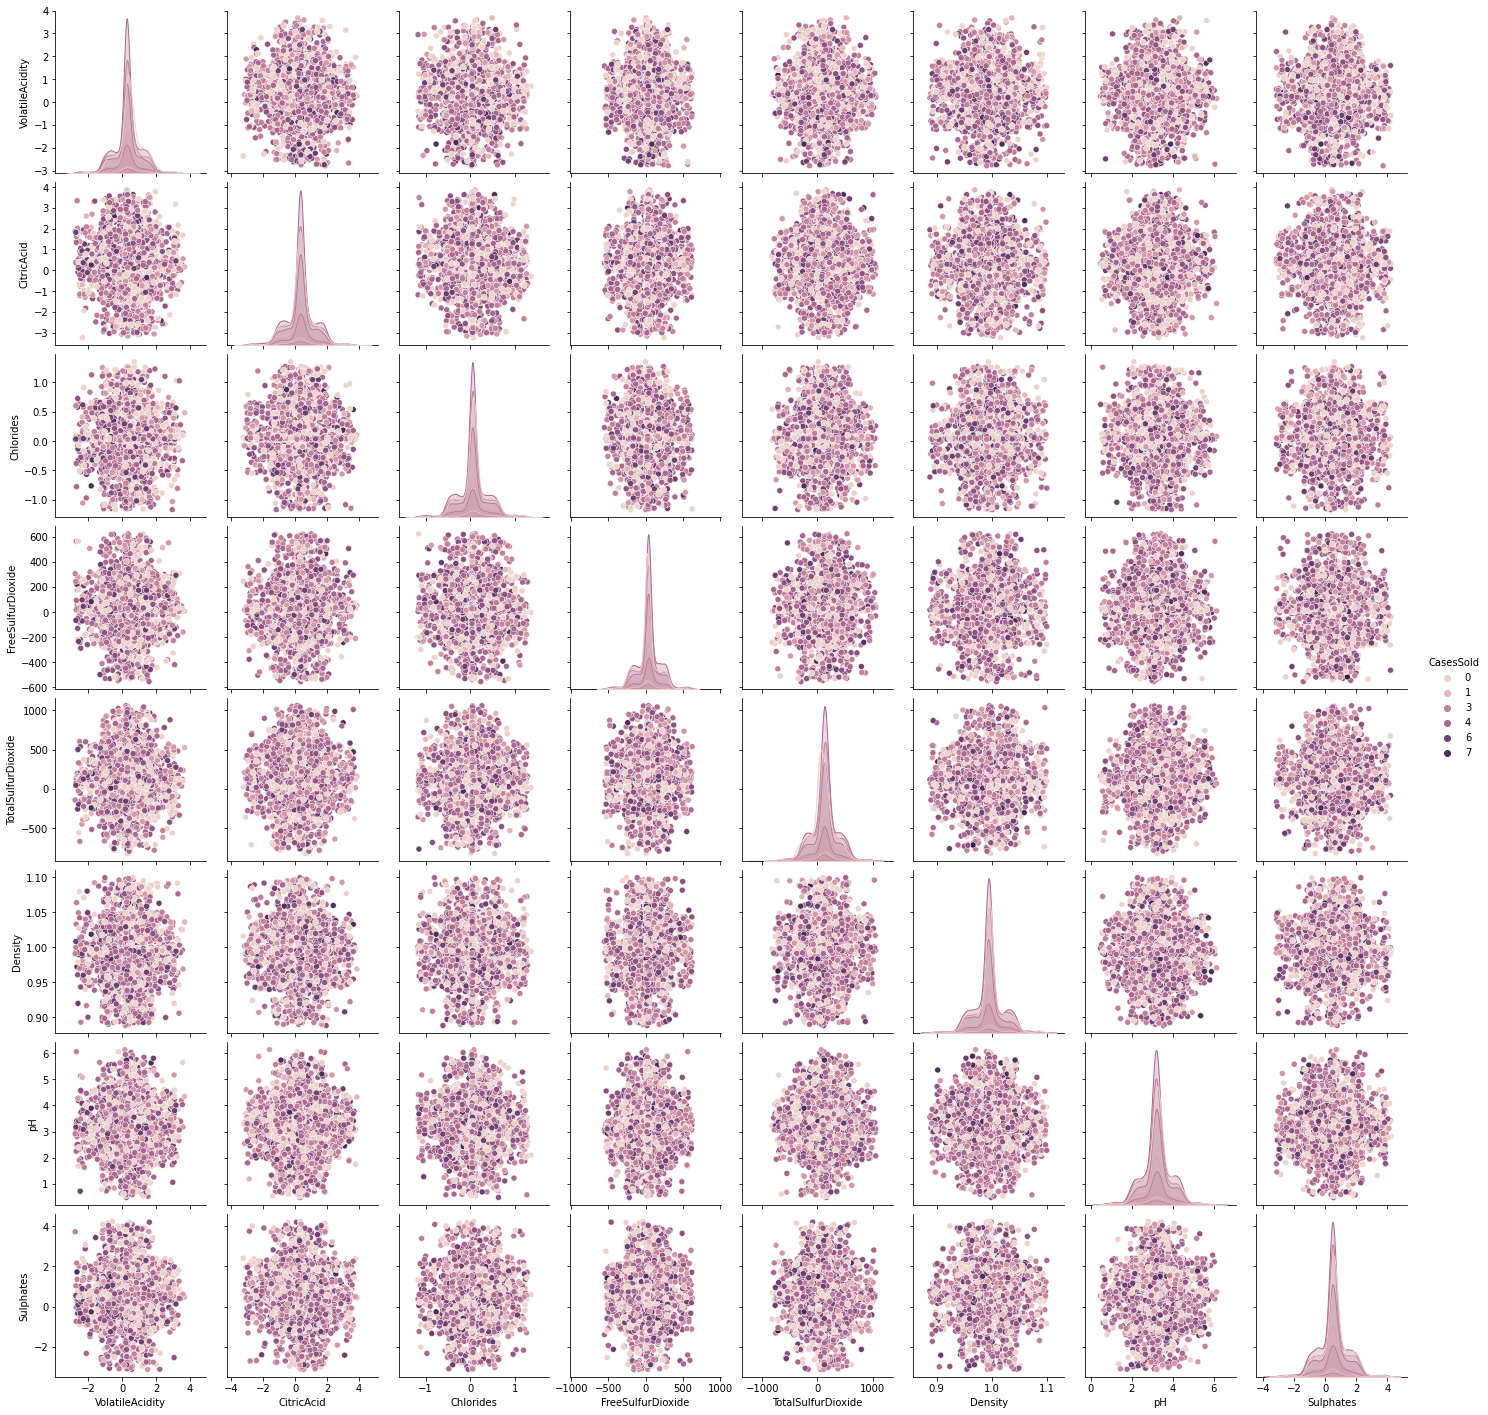

In [263]:
sns.pairplot(wines_within_range_df,hue=CASES)

Now that we can rely that most of the other columns hold helpful data, the unreliable data will be dropped.

In [ ]:
row_indexes_outside_range_dict.pop('AcidIndex')
row_indexes_outside_range_dict.pop('ResidualSugar')
row_indexes_outside_range_dict.pop('FixedAcidity')
row_indexes_outside_range_dict.pop('Alcohol')

In [283]:
wines_within_range_copy_df = wines_within_range_df.copy()
NUMERIC_COLUMN_INDECIES_UPDATED = range(1,wines_within_range_df.shape[1]-1)

col_ranges_updated = [volatile_acidity_gL_range,citric_acidity_gL_range,
                      chlorides_gL_range,fso2_ppm_range,tso2_ppm_range,
                      density_gL_range,pH_range,suphites_gL_range]

def checkExpertKnowledgeOfColumnRangesUPDATED(cols, col_ranges):
  row_indexes_outside_range = {}
  print(f'Number of rows INSIDE the expert domain knowledge range:\n')

  for x in cols:
    x_below_minimum_range = wines_df.iloc[:,1] < col_ranges[x][0]
    y_above_maximum_range = wines_df.iloc[:,1] > col_ranges[x][1]

    rows_outside_range = wines_df[(x_below_minimum_range) | (y_above_maximum_range)] 
    rows_outside_range_indexes = rows_outside_range.index

    col = wines_df.copy() #not right thing to do here
    col.drop(rows_outside_range_indexes, inplace = True)
    print(f'{COLS[x]:>18} --- {col.shape[0]:>5} rows ({col.shape[0]/max(wines_df.shape[0],1) *100:.2f}%)')

checkExpertKnowledgeOfColumnRangesUPDATED(NUMERIC_COLUMN_INDECIES_UPDATED, col_ranges_updated)

Number of rows INSIDE the expert domain knowledge range:

      FixedAcidity ---   178 rows (1.39%)
   VolatileAcidity ---   623 rows (4.87%)
        CitricAcid ---  1945 rows (15.20%)
     ResidualSugar ---  1945 rows (15.20%)
         Chlorides ---   199 rows (1.56%)
 FreeSulfurDioxide ---   591 rows (4.62%)
TotalSulfurDioxide ---    49 rows (0.38%)


In [285]:
def checkExpertKnowledgeOfColumnRangesUPDATED(cols, col_ranges):
  print(f'Number of rows INSIDE the expert domain knowledge range:\n')
  last_size = wines_within_range_copy_df.shape[0]
  
  for x in cols:
    x_below_minimum_range = wines_within_range_copy_df.iloc[:,1] < col_ranges[x][0]
    y_above_maximum_range = wines_within_range_copy_df.iloc[:,1] > col_ranges[x][1]
    rows_outside_range_indexes = wines_within_range_copy_df[(x_below_minimum_range) | (y_above_maximum_range)] .index

    wines_within_range_copy_df.drop(rows_outside_range_indexes, inplace = True)
    print(f'{COLS[x]:>18} --- {wines_within_range_copy_df.shape[0]:>5} rows ({last_size - wines_within_range_copy_df.shape[0]} less rows)')
    last_size = wines_within_range_copy_df.shape[0]

checkExpertKnowledgeOfColumnRangesUPDATED(NUMERIC_COLUMN_INDECIES_UPDATED, col_ranges_updated)

Number of rows INSIDE the expert domain knowledge range:

      FixedAcidity ---     0 rows (0 less rows)
   VolatileAcidity ---     0 rows (0 less rows)
        CitricAcid ---     0 rows (0 less rows)
     ResidualSugar ---     0 rows (0 less rows)
         Chlorides ---     0 rows (0 less rows)
 FreeSulfurDioxide ---     0 rows (0 less rows)
TotalSulfurDioxide ---     0 rows (0 less rows)


Goodness! The invalid row data appear to span every single row! 

Since there is still little (now relatively even less) correlation, we will not fill the missing data using regression, but rather with K nearest neighbours.

In [ ]:
# from sklearn.impute import KNNImputer
# import math

# CASES_SOLD_INDEX=0
# X = wines_within_range_df.iloc[:,CASES_SOLD_INDEX]
# y = np.array(wines_within_range_df.iloc[:,CASES_SOLD_INDEX+1:]).ravel()

# wines_without_nulls = wines_df.copy().dropna()
# wines_with_nulls_only = pd.DataFrame(wines_df[wines_df.isnull().any(axis=1)])

# NEIGHBOUR_COUNT=round(math.sqrt(wines_df.shape[0]))
# imputer = KNNImputer(n_neighbors=NEIGHBOUR_COUNT, weights="uniform")
# absolute_input_knn=pd.DataFrame(imputer.fit_transform(wines_df.iloc[:,1:]),columns=COLS[1:]) #excluding CasesSold target column
# absolute_input_knn.head()

In [ ]:
# kmeans attempt in progress...

# from sklearn.cluster import KMeans
# from sklearn import svm

# kmeans = KMeans(n_clusters=10).fit(wines_without_nulls)
# X = wines_without_nulls.iloc[:,CASES_SOLD_INDEX+1:]
# y = np.array(wines_without_nulls.iloc[:,CASES_SOLD_INDEX]).ravel()
# svm = svm.SVR().fit(X, y)

# CASES_SOLD_INDEX = 0
# SINGLE_COL_MISSING = len(COLS)-1
# for x in range(wines_with_nulls.shape[0]):

#   row_original = wines_with_nulls.iloc[x,:]
#   row_df = pd.DataFrame(row_original).T
#   row_df.dropna(axis=1,inplace=True)
#   row = row_df.values

#   if len(row[0]) == SINGLE_COL_MISSING:
#     wines_with_nulls.iloc[x,:] = wines_with_nulls.iloc[x,:].fillna(svm.predict(row_df), inplace = True) #error...
#     print(wines_with_nulls.iloc[x])

# wines_df.isnull().sum()